# Gaussian Naive Bayes From Scratch

Implementing Gaussian Naive Bayes using NumPy.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

---
## Gaussian Naive Bayes Class

In [2]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-9  # Add small value for stability
            self.priors[c] = X_c.shape[0] / X.shape[0]
        
        return self
    
    def _calculate_likelihood(self, x, mean, var):
        # Gaussian probability density
        eps = 1e-9
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
        return coeff * exponent
    
    def _calculate_posterior(self, x):
        posteriors = {}
        
        for c in self.classes:
            # Start with prior (in log space)
            posterior = np.log(self.priors[c])
            
            # Add log likelihoods for each feature
            likelihood = self._calculate_likelihood(x, self.mean[c], self.var[c])
            posterior += np.sum(np.log(likelihood + 1e-9))
            
            posteriors[c] = posterior
        
        return posteriors
    
    def predict(self, X):
        predictions = []
        
        for x in X:
            posteriors = self._calculate_posterior(x)
            predictions.append(max(posteriors, key=posteriors.get))
        
        return np.array(predictions)
    
    def predict_proba(self, X):
        probas = []
        
        for x in X:
            posteriors = self._calculate_posterior(x)
            # Convert log probabilities to probabilities
            total = np.log(sum(np.exp(p) for p in posteriors.values()))
            proba = {c: np.exp(p - total) for c, p in posteriors.items()}
            probas.append([proba[c] for c in self.classes])
        
        return np.array(probas)

print('GaussianNaiveBayes class ready')

GaussianNaiveBayes class ready


---
## Test on Iris Dataset

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (120, 4), Test: (30, 4)


In [4]:
# Our implementation
nb = GaussianNaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = np.mean(y_pred == y_test)
print('='*50)
print('OUR GAUSSIAN NAIVE BAYES')
print('='*50)
print(f'Accuracy: {acc*100:.2f}%')
print(f'\nClass priors: {nb.priors}')

OUR GAUSSIAN NAIVE BAYES
Accuracy: 100.00%

Class priors: {np.int64(0): 0.3333333333333333, np.int64(1): 0.3416666666666667, np.int64(2): 0.325}


In [5]:
# sklearn implementation
sklearn_nb = GaussianNB()
sklearn_nb.fit(X_train, y_train)
y_pred_sk = sklearn_nb.predict(X_test)

acc_sk = np.mean(y_pred_sk == y_test)
print('='*50)
print('SKLEARN GAUSSIAN NAIVE BAYES')
print('='*50)
print(f'Accuracy: {acc_sk*100:.2f}%')
print(f'\nDifference: {abs(acc - acc_sk)*100:.2f}%')

SKLEARN GAUSSIAN NAIVE BAYES
Accuracy: 100.00%

Difference: 0.00%


---
## Visualize Class Distributions

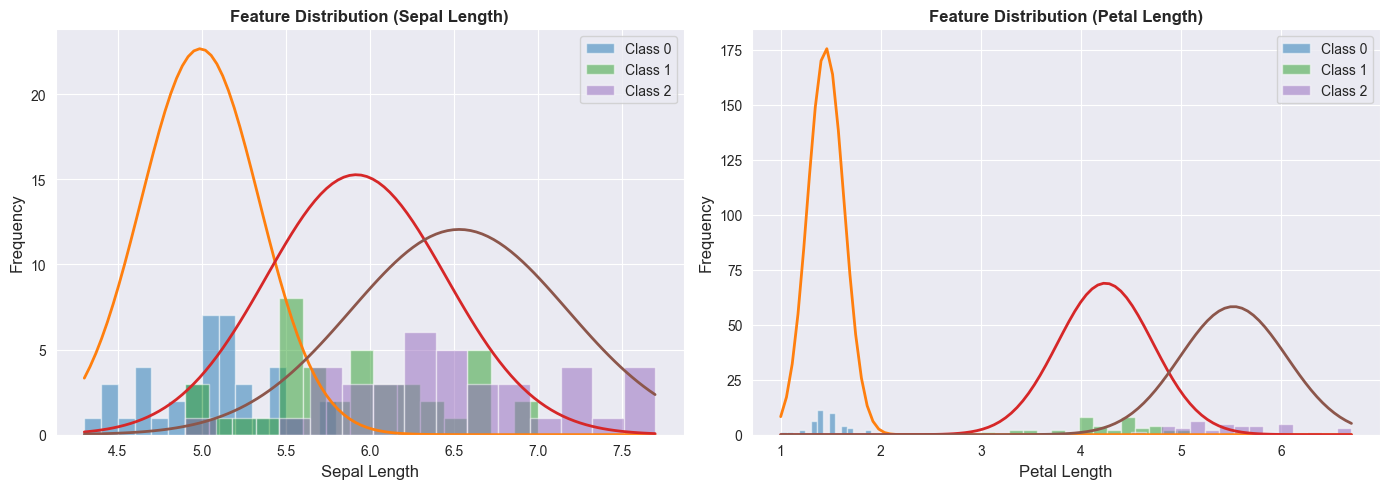

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Feature 0 (sepal length)
for c in nb.classes:
    X_c = X_train[y_train == c, 0]
    axes[0].hist(X_c, bins=15, alpha=0.5, label=f'Class {c}')
    
    # Plot Gaussian fit
    x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    gaussian = nb._calculate_likelihood(x_range, nb.mean[c][0], nb.var[c][0])
    axes[0].plot(x_range, gaussian * len(X_c) * 0.5, linewidth=2)

axes[0].set_xlabel('Sepal Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Feature Distribution (Sepal Length)', fontweight='bold')
axes[0].legend()

# Feature 2 (petal length)
for c in nb.classes:
    X_c = X_train[y_train == c, 2]
    axes[1].hist(X_c, bins=15, alpha=0.5, label=f'Class {c}')
    
    x_range = np.linspace(X_train[:, 2].min(), X_train[:, 2].max(), 100)
    gaussian = nb._calculate_likelihood(x_range, nb.mean[c][2], nb.var[c][2])
    axes[1].plot(x_range, gaussian * len(X_c) * 2, linewidth=2)

axes[1].set_xlabel('Petal Length', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Feature Distribution (Petal Length)', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

---
## Summary

**What We Built:**
- Gaussian Naive Bayes from scratch
- Log-space calculations (numerical stability)
- Probability predictions

**Key Insights:**
- Fast and simple
- Works well despite independence assumption
- Matches sklearn performance

**Key Point:** "Naive Bayes assumes feature independence and models each feature's distribution per class. Despite the 'naive' assumption, it's effective for many real-world tasks, especially with high-dimensional data."